In [1]:
import numpy as np
import pandas as pd
import psycopg2
import dotenv
import os
from matplotlib import animation
from matplotlib import pyplot as plt

from mplsoccer import Pitch

In [2]:
dotenv.load_dotenv()

PG_PASSWORD = os.getenv("PG_PASSWORD")
PG_USER = os.getenv("PG_USER")
PG_HOST = os.getenv("PG_HOST")
PG_PORT = os.getenv("PG_PORT")
PG_DATABASE = os.getenv("PG_DB")

# Database connection parameters
import psycopg2
import os

conn = psycopg2.connect(
    host=PG_HOST,
    database=PG_DATABASE,
    user=PG_USER,
    password=PG_PASSWORD,
    port=PG_PORT,
    sslmode="require",
)

# Query to fetch tracking data

query = """
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.jersey_number, p.player_name, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg'
ORDER BY timestamp;
"""
tracking_df = pd.read_sql_query(query, conn)
tracking_df.head(10)

,frame_id,timestamp,player_id,x,y,jersey_number,player_name,team_id
0,1722802500280,00:00:00.280000,pi2sxs616a52jvpfywgwjowl,28.331000,28.988536,22,G. Ruyssen,4dtif7outbuivua8umbwegoo5
1,1722802500280,00:00:00.280000,8pikky0bmotvh3u1bpxqhcyxh,28.889509,50.523279,21,K. Cools,4dtif7outbuivua8umbwegoo5
2,1722802500280,00:00:00.280000,32sds4yk7ch30mng0gyzhdk9h,64.346233,40.874764,20,S. Mitrović,8y3iucyxguipljcmf87a11bk9
3,1722802500280,00:00:00.280000,7xohgebtjrdvhgamhfpp7w31m,41.070820,59.442909,24,M. Viltard,4dtif7outbuivua8umbwegoo5
4,1722802500280,00:00:00.280000,8fs5klbsyx06c5ds9s1i3xu96,49.336066,62.613527,7,Hong Hyun-Seok,8y3iucyxguipljcmf87a11bk9
5,1722802500280,00:00:00.280000,39307g4mv5kms5rtlss0x756,50.022623,65.682027,98,J. Soladio,4dtif7outbuivua8umbwegoo5
6,1722802500280,00:00:00.280000,8lqo2ajhgjockasmd198nai1,27.775155,70.126555,3,J. Pupe,4dtif7outbuivua8umbwegoo5
7,1722802500280,00:00:00.280000,2hr7skflmxmpiiauz04h185ey,50.377705,51.256393,77,B. Nsimba,4dtif7outbuivua8umbwegoo5
8,1722802500280,00:00:00.280000,ball,45.750820,50.091803,0,Ball,1oyb7oym5nwzny8vxf03szd2h
9,1722802500280,00:00:00.280000,60gs7lod7de72ypcs6qfup8q2,49.473770,39.440655,9,A. Guðjohnsen,8y3iucyxguipljcmf87a11bk9


In [20]:
conn = psycopg2.connect(
    host=PG_HOST,
    database=PG_DATABASE,
    user=PG_USER,
    password=PG_PASSWORD,
    port=PG_PORT,
    sslmode="require",
)

ballquery="""
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg' AND p.player_id = 'ball'
ORDER BY timestamp;
"""
# Differentiating teams logic
team_query = """
SELECT DISTINCT p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id AND p.player_id != 'ball'
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg';
"""
team_ids_df = pd.read_sql_query(team_query, conn)  # Fetch the query result as a DataFrame
# Extract the team IDs as a list
team_ids = team_ids_df['team_id'].tolist()




teamqueries = """
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg' AND p.player_id != 'ball' AND p.team_id = %s
ORDER BY timestamp;
"""



df_ball = pd.read_sql_query(ballquery,conn)
df_home = pd.read_sql_query(teamqueries, conn, params=(team_ids[0],))
df_away = pd.read_sql_query(teamqueries, conn, params=(team_ids[1],))

print(df_ball.head(50))


         frame_id        timestamp player_id          x          y  \
0   1722802500280  00:00:00.280000      ball  45.750820  50.091803   
1   1722798901000         00:00:01      ball  46.832787  49.868852   
2   1722802501280  00:00:01.280000      ball  37.137500  51.901639   
3   1722798902000         00:00:02      ball  46.311475  54.131148   
4   1722802502280  00:00:02.280000      ball  35.024224  54.380328   
5   1722798903000         00:00:03      ball  44.914754  65.412273   
6   1722802503280  00:00:03.280000      ball  28.746552  67.339091   
7   1722798904000         00:00:04      ball  43.872131  75.331818   
8   1722802504280  00:00:04.280000      ball  27.006207  71.521000   
9   1722798905000         00:00:05      ball  41.934426  90.593425   
10  1722802505280  00:00:05.280000      ball  29.687759  68.695000   
11  1722798906000         00:00:06      ball  40.795776  94.572543   
12  1722802506280  00:00:06.280000      ball  39.330690  58.389091   
13  1722798907000   

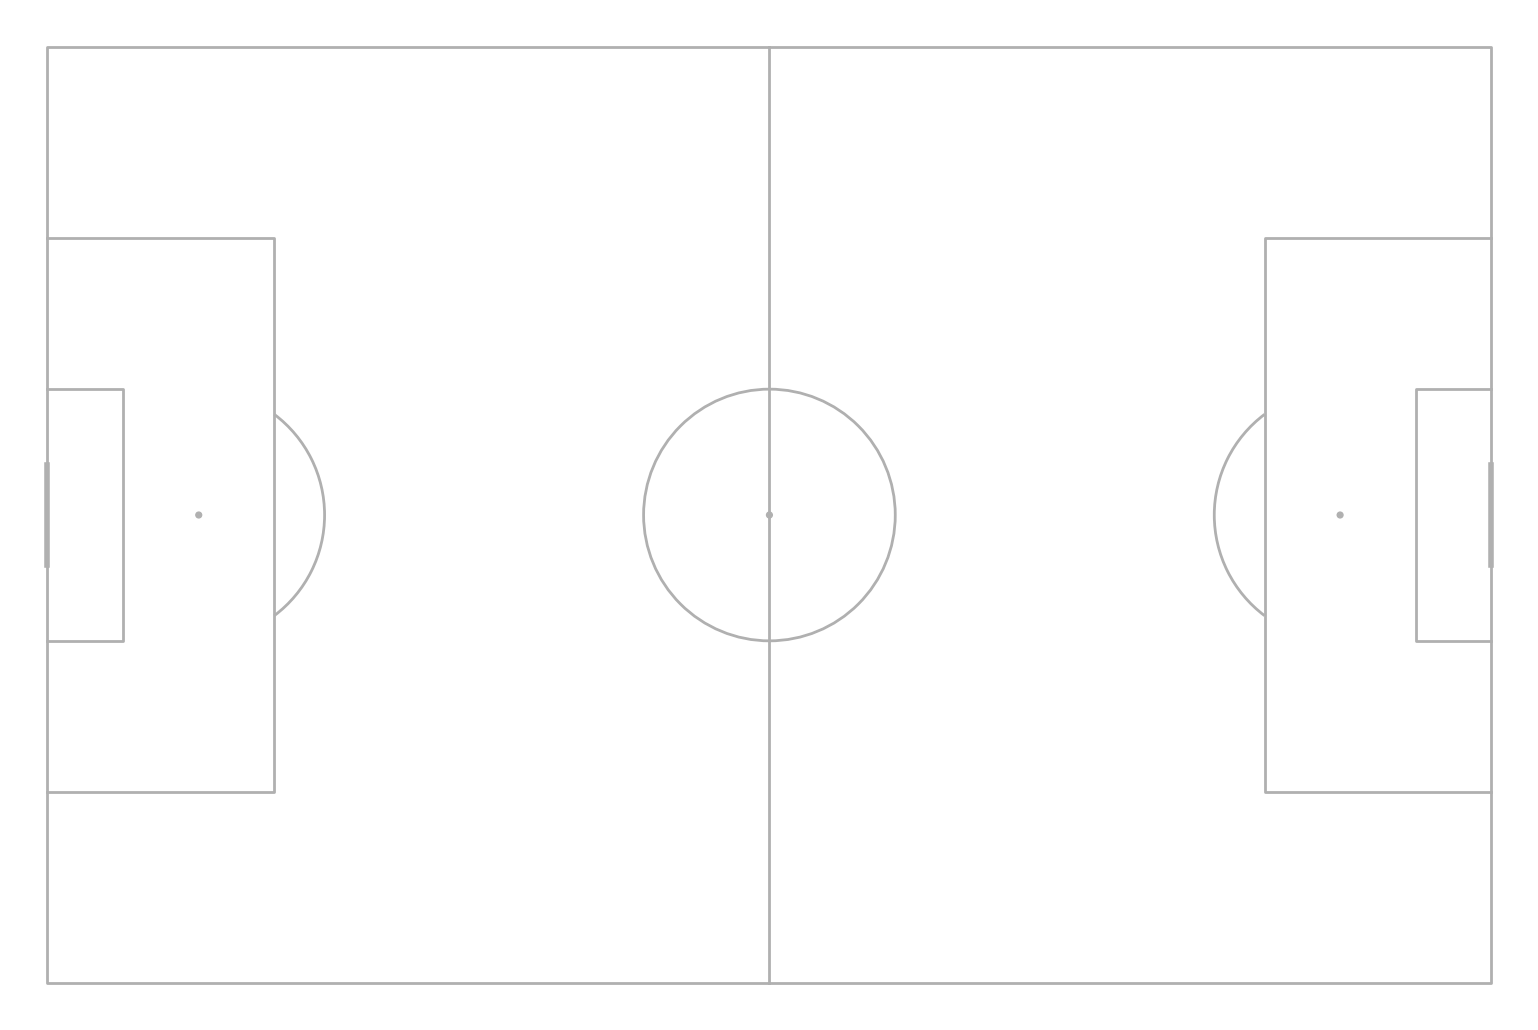

In [ ]:
conn = psycopg2.connect(
    host=PG_HOST,
    database=PG_DATABASE,
    user=PG_USER,
    password=PG_PASSWORD,
    port=PG_PORT,
    sslmode="require",
)

ballquery="""
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg' AND p.player_id = 'ball'
ORDER BY timestamp;
"""
# Differentiating teams logic
team_query = """
SELECT DISTINCT p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id AND p.player_id != 'ball'
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg';
"""
team_ids_df = pd.read_sql_query(team_query, conn)  # Fetch the query result as a DataFrame
# Extract the team IDs as a list
team_ids = team_ids_df['team_id'].tolist()




teamqueries = """
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg' AND p.player_id != 'ball' AND p.team_id = %s
ORDER BY timestamp;
"""



df_ball = pd.read_sql_query(ballquery,conn)
df_home = pd.read_sql_query(teamqueries, conn, params=(team_ids[0],))
df_away = pd.read_sql_query(teamqueries, conn, params=(team_ids[1],))


# First set up the figure, the axis
pitch = Pitch(pitch_type='metricasports', goal_type='line', pitch_width=68, pitch_length=105)
fig, ax = pitch.draw(figsize=(16, 10.4))

# then setup the pitch plot markers we want to animate
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
ball, = ax.plot([], [], ms=6, markerfacecolor='w', zorder=3, **marker_kwargs)
away, = ax.plot([], [], ms=10, markerfacecolor='#b94b75', **marker_kwargs)  # red/maroon
home, = ax.plot([], [], ms=10, markerfacecolor='#7f63b8', **marker_kwargs)  # purple


# animation function
def animate(i):
    """ Function to animate the data. Each frame it sets the data for the players and the ball."""
    # set the ball data with the x and y positions for the ith frame
    ball.set_data(df_ball.iloc[i, [3]], df_ball.iloc[i, [4]])
    # get the frame id for the ith frame
    frame = df_ball.iloc[i, 1]
    # set the player data using the frame id
    away.set_data(df_away.loc[df_away.timestamp == frame, 'x'],
                  df_away.loc[df_away.timestamp == frame, 'y'])
    home.set_data(df_home.loc[df_home.timestamp == frame, 'x'],
                  df_home.loc[df_home.frame_id == frame, 'y'])
    return ball, away, home


# call the animator, animate so 25 frames per second
#anim = animation.FuncAnimation(fig, animate, frames=len(df_ball), interval=50, blit=True)
#plt.show()

# note th<at its hard to get the ffmpeg requirements right.
# I installed from conda-forge: see the environment.yml file in the docs folder
# how to save animation - commented out for example
# anim.save('example.mp4', dpi=150, fps=25,
#          extra_args=['-vcodec', 'libx264'],
#          savefig_kwargs={'pad_inches':0, 'facecolor':'#457E29'})